In [1]:
import numpy as np 
import pandas as pd
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import matplotlib.pyplot as plt
import torch
torch.cuda.empty_cache()

dirList = os.listdir("/kaggle/input/traffic-signs-v5/archive(1)/Train") 
finDirList = [str(x) for x in dirList]
dictMapping = {}
z=0
for y in dirList:
    dictMapping[z] = y
    z+=1
trainData, valData = keras.utils.image_dataset_from_directory("/kaggle/input/traffic-signs-v5/archive(1)/Train", labels="inferred", label_mode="int", batch_size=64, image_size=(200,200), validation_split=0.3, subset="both", seed=42, shuffle=True, class_names=finDirList)



2025-06-15 23:07:11.148904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750028831.356586      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750028831.419792      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 39209 files belonging to 43 classes.
Using 27447 files for training.
Using 11762 files for validation.


I0000 00:00:1750028865.753371      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


2
(200, 200, 3)


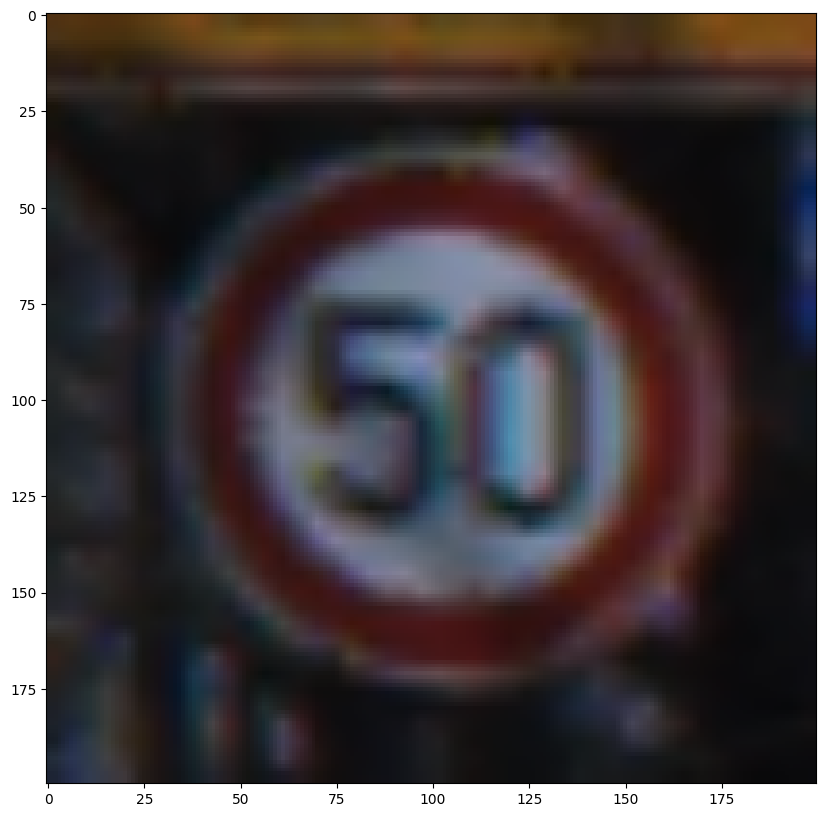

In [2]:
plt.figure(figsize=(10, 10))
for images, labels in trainData.take(1):
    plt.imshow(np.array(images[35]).astype("uint8"))
    value = dictMapping[int(labels[35])]
    print(value)
    print((np.array(images[35]).astype("uint8")).shape)

In [3]:
model = keras.Sequential()
model.add(keras.Input(shape=(200,200,3)))
model.add(keras.layers.Rescaling(scale=1.0/255))
model.add(keras.layers.Conv2D(filters=4, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(64, 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(43, 'linear'))
model.add(keras.layers.Softmax())

In [4]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [5]:
model.fit(trainData, epochs=30,  validation_data=valData)

Epoch 1/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - accuracy: 0.0855 - loss: 3.4515 - val_accuracy: 0.1009 - val_loss: 3.1679
Epoch 2/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.1701 - loss: 2.9540 - val_accuracy: 0.1887 - val_loss: 2.8113
Epoch 3/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.1922 - loss: 2.7998 - val_accuracy: 0.1944 - val_loss: 2.8140
Epoch 4/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.2106 - loss: 2.7133 - val_accuracy: 0.2298 - val_loss: 2.6245
Epoch 5/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.2262 - loss: 2.6675 - val_accuracy: 0.2370 - val_loss: 2.5817
Epoch 6/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.2313 - loss: 2.6037 - val_accuracy: 0.1886 - val_loss: 2.9892
Epoch 7/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.2415 - loss: 2.5676 - val_accuracy: 0.2495 - val_loss: 2.5240
Epoch 8/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.2511 - loss: 2.5347 -

In [6]:
model.save("/kaggle/working/finalcnn_model.keras")

In [7]:
finalDir = "/kaggle/input/traffic-signs-v5/archive(1)/Test"
os.chdir(finalDir)
results = []
for z in os.listdir():
    splitFile = z.split("_")
    concatPath = os.path.join(finalDir, z)
    imageTest = keras.utils.load_img(concatPath, target_size=(200,200))
    img_array = keras.utils.img_to_array(imageTest)
    img_array = keras.ops.expand_dims(img_array, 0)
    predict = model.predict(img_array, verbose=False)
    predict = np.argmax(predict[0])
    predClass = dictMapping[predict]
    if splitFile[0] == predClass:
        results.append(True)
    else:
        results.append(False)


In [8]:
numTrues = 0
for x in results:
    if x == True:
       numTrues+=1
numTrues/len(results)

0.269833729216152